## LT8

* Gavin Cua
* Ron Lao
* Allan Tan
* Aly Valerio

### Load the Data

In [13]:
import pandas as pd

# Load the dataset
file_path = 'housing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Check for any missing data

In [14]:
# Check for missing data in the dataset
missing_data = data.isnull().sum()

# Display columns with missing data
print(missing_data[missing_data > 0])

total_bedrooms    207
dtype: int64


In [15]:
# Remove rows with missing data before encoding
data = data.dropna()
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Cleaning and Pre-processing the Data

In [16]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'ocean_proximity' column
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[['ocean_proximity']]).toarray()
encoded_feature_names = encoder.get_feature_names_out(['ocean_proximity'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=data.index)

# Combine the encoded columns with the original dataset
data = pd.concat([data.drop('ocean_proximity', axis=1), encoded_df], axis=1)

# Display the preprocessed data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


### Run Random Forest

In [5]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

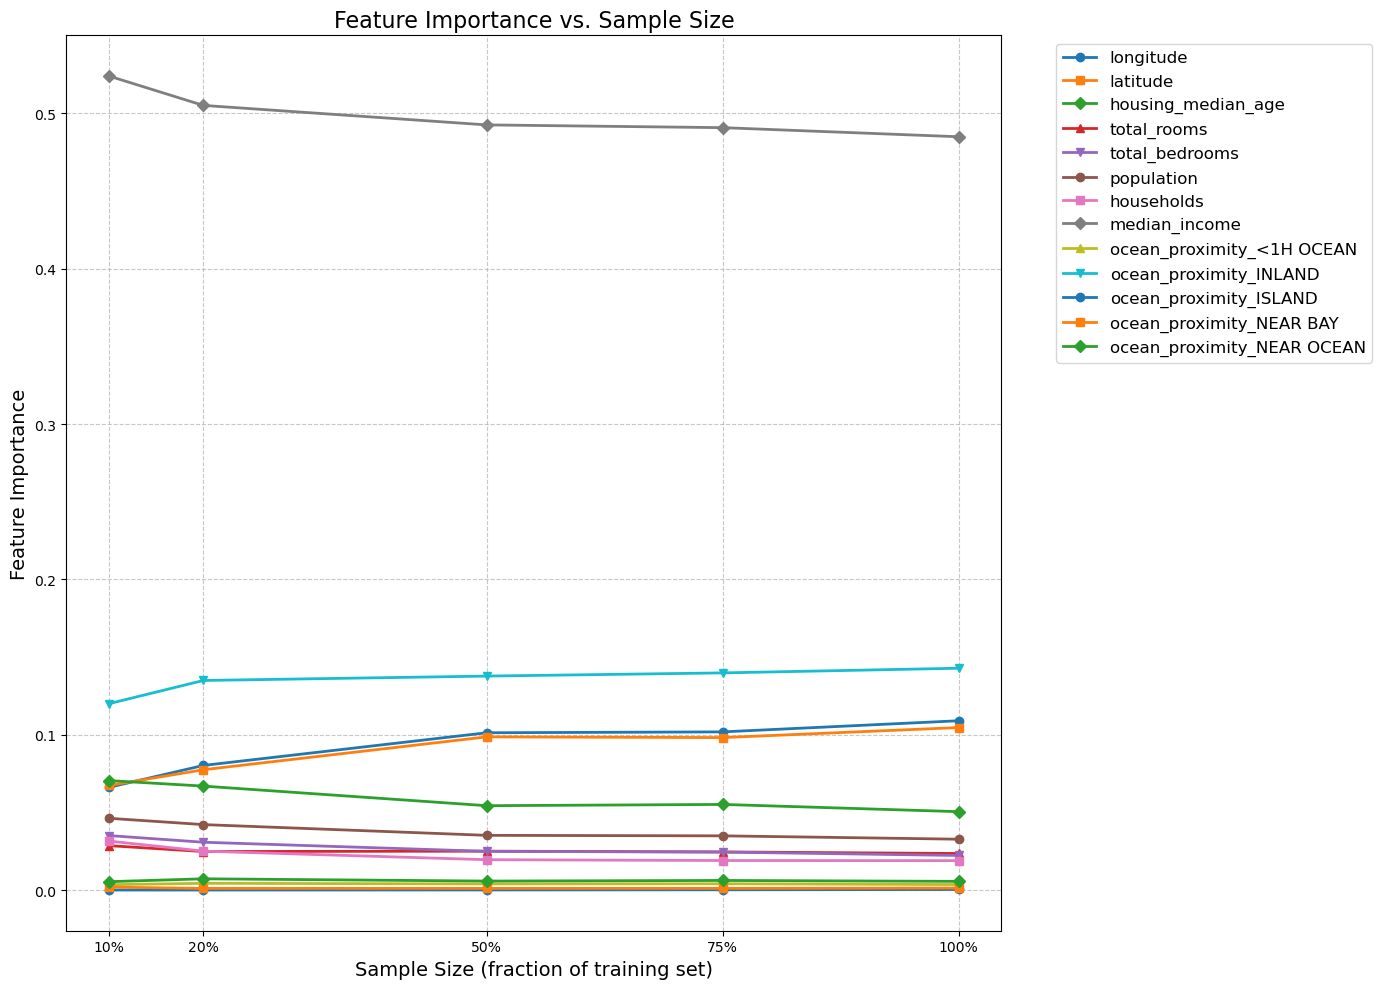

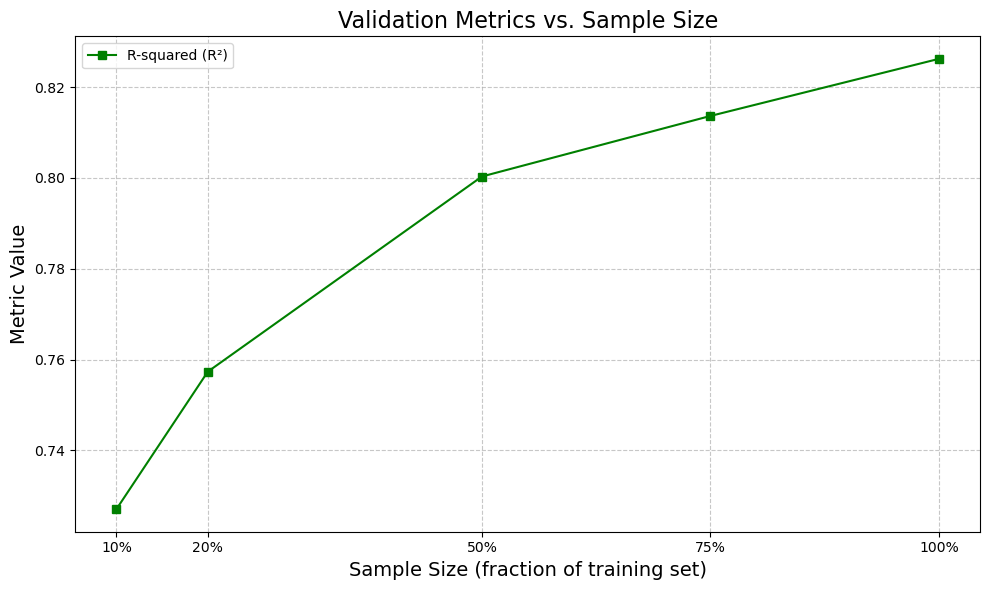

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define the sample sizes as percentages of the training set
sample_sizes = [0.1, 0.2, 0.5, 0.75, 1.0]  # 10%, 20%, 50%, 75%, and 100% of the training data
feature_importances_df = pd.DataFrame()
mae_scores = []
r2_scores = []

# Loop through each sample size, train the model, and record feature importances and validation metrics
for sample_size in sample_sizes:
    if sample_size < 1.0:
        # Sample the training data
        X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=sample_size, random_state=42)
    else:
        # Use the full training set
        X_sample, y_sample = X_train, y_train
    
    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_sample, y_sample)
    
    # Get feature importances
    importances = model.feature_importances_
    feature_importances_df[sample_size] = importances

    # Predict on the validation set and calculate metrics
    y_pred = model.predict(X_val)
    #mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    # Store the metrics
    #mae_scores.append(mae)
    r2_scores.append(r2)

# Set feature names as the index
feature_importances_df.index = X.columns

# Plot feature importance changes with a clean layout
plt.figure(figsize=(14, 10))
markers = ['o', 's', 'D', '^', 'v']  # Different markers for each sample size

for i, feature in enumerate(feature_importances_df.index):
    plt.plot(sample_sizes, feature_importances_df.loc[feature], label=feature, marker=markers[i % len(markers)], linewidth=2)

plt.title('Feature Importance vs. Sample Size', fontsize=16)
plt.xlabel('Sample Size (fraction of training set)', fontsize=14)
plt.ylabel('Feature Importance', fontsize=14)
plt.xticks(sample_sizes, [f'{int(size * 100)}%' for size in sample_sizes])  # Customize x-axis labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout for better viewing
plt.show()

# Plot R² metrics
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, r2_scores, marker='s', label="R-squared (R²)", color='g')
plt.title("Validation Metrics vs. Sample Size", fontsize=16)
plt.xlabel("Sample Size (fraction of training set)", fontsize=14)
plt.ylabel("Metric Value", fontsize=14)
plt.xticks(sample_sizes, [f'{int(size * 100)}%' for size in sample_sizes])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We observed that despite changes in sample size when running the Random Forest, "Median_Income" consistently has the highest feature importance. Additionally, the R² value is higher when using the entire dataset.

### SHAP

It is okay to not run this one anymore to save you some time :)

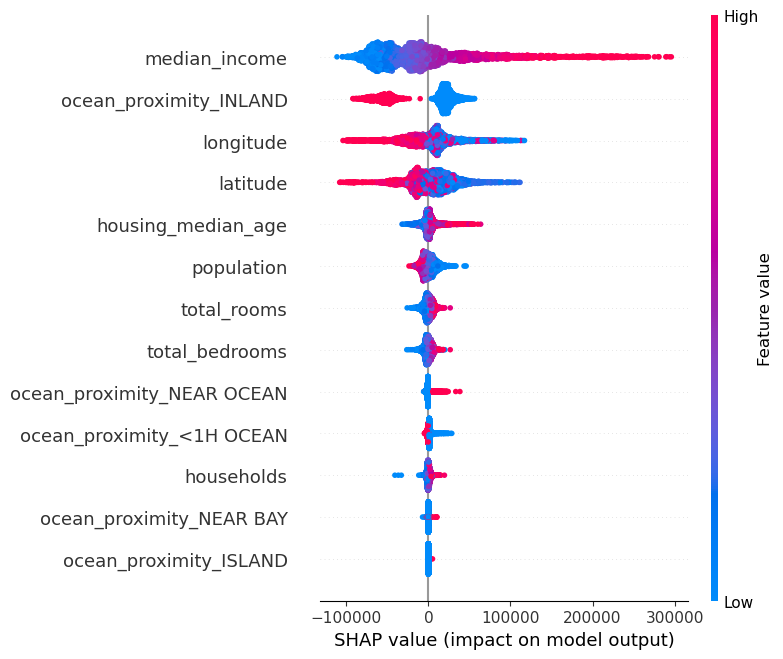

In [34]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test)

Did the 10%, 20%, 50%, and 75% sample sizes here

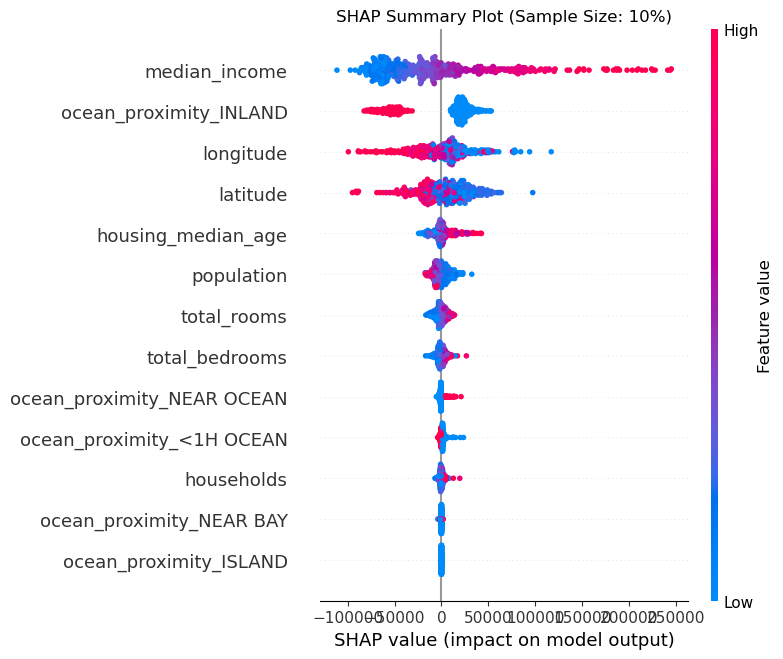

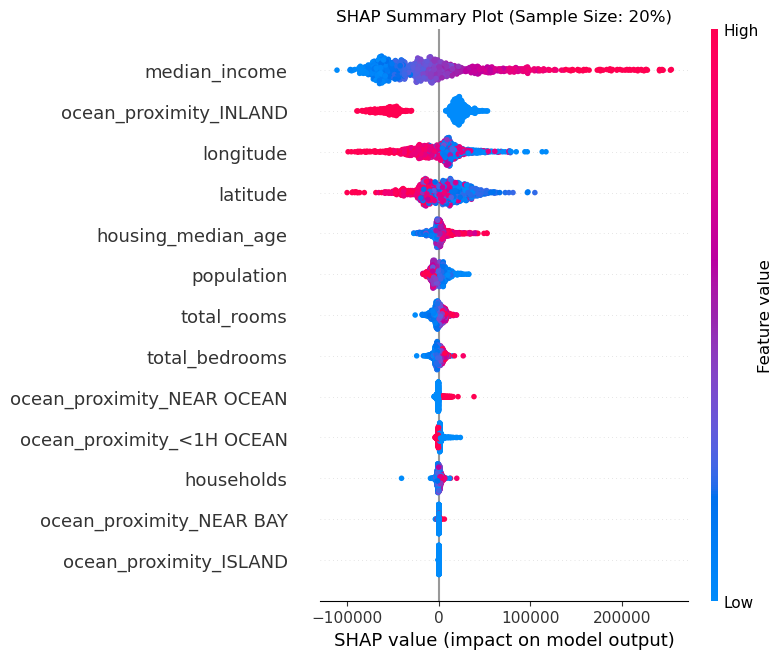

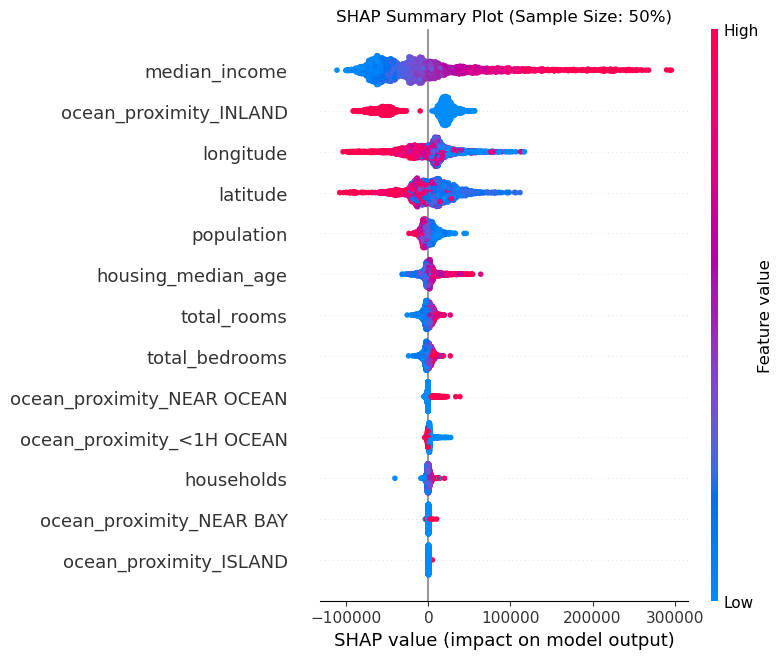

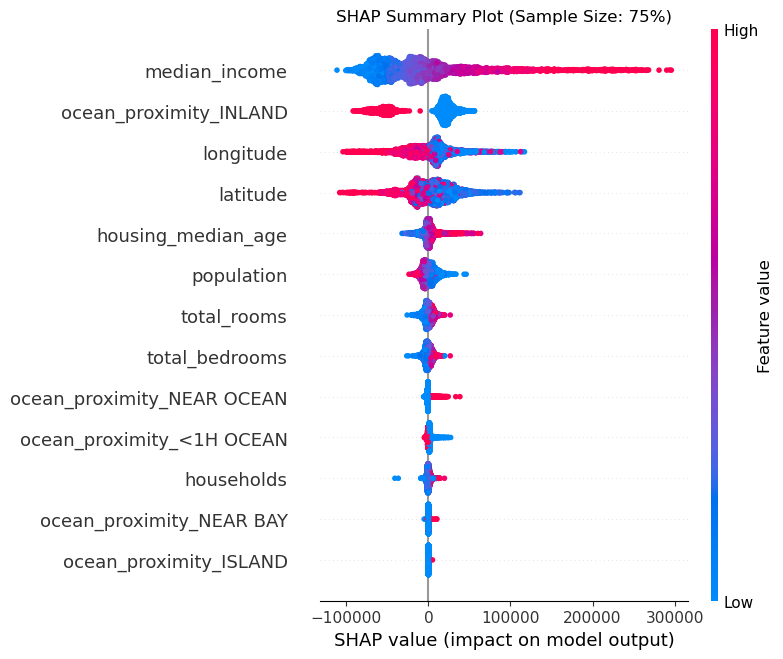

In [24]:
import shap
import matplotlib.pyplot as plt

# Define the sample sizes as percentages of the training set to use for SHAP
sample_sizes = [0.1, 0.2, 0.5, 0.75]  # 10%, 20%, 50%, and 75%

# Loop through each sample size and generate SHAP plots
for sample_size in sample_sizes:
    # Take a sample of the test data
    X_sample = X_test.sample(frac=sample_size, random_state=42)
    
    # Initialize the SHAP explainer for the current model
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sample)
    
    # Plot SHAP summary for the current sample size
    plt.title(f'SHAP Summary Plot (Sample Size: {int(sample_size * 100)}%)')
    shap.summary_plot(shap_values, X_sample)

Across various sample sizes, our SHAP analysis consistently shows that "median_income" is the most influential predictor of housing prices. This suggests a strong correlation between income levels in a district and property values, as areas with higher income generally support higher-priced housing markets. Income is a critical factor in determining purchasing power, which directly influences housing demand and affordability. This insight underscores the importance of economic factors in real estate, where higher income typically correlates with a demand for more valuable properties.

Following "median_income," location-related features, particularly "ocean_proximity," are also significant in predicting house prices. This finding reflects the premium placed on desirable locations, especially those close to the ocean, which adds value to properties. Lastly, the median age of the house ranks next in importance, indicating that while the property's age affects value, it’s less critical compared to income and location. This could be due to older homes having either reduced market value or potential historical appeal, depending on the area. Together, these results highlight the stability and importance of income, location, and age in determining housing prices, offering valuable insights for real estate strategies and policy planning.

### DICE

In [37]:
import dice_ml
from dice_ml import Dice

# Initialize DiCE for a regression model
data_dice = dice_ml.Data(
    dataframe=data, 
    continuous_features=['longitude', 'latitude', 'housing_median_age', 
                         'total_rooms', 'total_bedrooms', 'population', 
                         'households', 'median_income'], 
    outcome_name='median_house_value'
)
model_dice = dice_ml.Model(model=model, backend="sklearn", model_type='regressor')

# Create a DiCE explainer
dice_explainer = Dice(data_dice, model_dice)

# Generate counterfactuals for a test instance
query_instance = X_test.iloc[[0]]  # Use the first instance from X_test
dice_exp = dice_explainer.generate_counterfactuals(query_instance, total_CFs=3, desired_range=[200000, 300000])

# Display counterfactuals
dice_exp.visualize_as_dataframe()

100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

Query instance (original outcome : 212173.0)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-117.239998,32.790001,20.0,961.0,278.0,525.0,254.0,3.1838,0.0,0.0,0.0,0.0,1.0,212173.0



Diverse Counterfactual set (new outcome: [200000, 300000])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-117.24,32.79,20.0,961.0,669.7,525.0,254.0,3.1838,0.0,0.0,0.0,0.0,1.0,243436.062500
1,-117.24,34.81,20.0,961.0,278.0,525.0,1488.4,3.1838,0.0,0.0,0.0,0.0,1.0,215762.015625
2,-117.24,40.20,20.0,961.0,278.0,525.0,254.0,3.1838,0.0,0.0,0.0,0.0,1.0,205793.015625


The DiCE results indicate that small adjustments to specific features can bring the median_house_value into the target range of [200,000, 300,000]. Key influential features include total_bedrooms, households, and latitude. For instance, increasing total_bedrooms or households in the counterfactuals led to a noticeable rise in median_house_value. Additionally, the consistency of ocean_proximity_NEAR OCEAN = 1 in all counterfactuals underscores the significant role of proximity to the ocean in maintaining or increasing property values in this context.

These diverse counterfactuals suggest multiple strategies to reach the same target range, which could guide practical applications. For example, real estate developers could focus on increasing available bedrooms or household density to raise property values, while policymakers might consider the impact of geographic and demographic factors on housing markets. This variety of paths offers flexibility for decision-makers in planning or development, adapting strategies based on available resources or community goals.

### LIME

In [25]:
import lime
import lime.lime_tabular

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, 
    feature_names=X_train.columns, 
    mode='regression'
)

# Explain a single prediction (using the first instance from the test set)
exp = explainer.explain_instance(
    X_test.iloc[0].values, 
    model.predict, 
    num_features=5
)

# Show the explanation in the notebook
exp.show_in_notebook()


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Positive Influences:

1. Ocean Proximity (INLAND): Being classified as not inland (value = 0) has a significant positive impact, adding around 78,388 to the predicted value. This reinforces the importance of proximity to the ocean for higher property values.
2. Latitude: A latitude of 32.79 (less than or equal to 33.93) also positively impacts the prediction, adding about 49,756.99 to the house value, suggesting that southern locations (closer to the coast) may increase property desirability and value.
3. Population: With a population of 525 (less than or equal to 787), this also contributes positively (adding around 12,543.54), indicating that areas with moderate population density might be more valued.

Negative Influences:

1. Median Income: A lower median income (below 2.56) strongly reduces the predicted value by approximately 57,371.11, showing that income levels are a crucial factor in predicting higher housing prices.
2. Longitude: A longitude of -117.24 (greater than -118.01) has a negative impact, reducing the value by 40,539.62. This suggests that locations further east (away from the coast) tend to decrease property value.